## Converting DICOM data into Nifti data

## Importing libraries 

In [16]:
# Make sure you have first install dicom2nifti package (%pip install dicom2nifti)
import nibabel as nib
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi
from nibabel.testing import data_path
import matplotlib.pyplot as plt
import dicom2nifti 
import os

## Reading the path and converting DICOM slices into one NifTI file 

In [2]:
dicom_directory = ("/Users/ameen/Desktop/Neurohacking /Neurohacking_data-master/BRAINIX/DICOM/FLAIR")
output_folder =("/Users/ameen/Desktop/Neurohacking /Neurohacking_data-master/BRAINIX/DICOM")

dicom2nifti.convert_directory(dicom_directory, output_folder, compression=True, reorient=True)

In [9]:
file =("/Users/ameen/Desktop/Neurohacking /Neurohacking_data-master/BRAINIX/DICOM/Flair.nii.gz")
slices = os.path.join(data_path,file)
flair_img = nib.load(slices)
flair_img

### We can also access data from the image header. Let’s assign the header of an image to a variable and print it to view it’s contents.

In [10]:
flair_header = flair_img.header
print(flair_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 288 288  22   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.7986111  0.7986111  6.         1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.00043226505
quatern_c       : -0.99927855
quatern_d       : 0.03603492
qoffset_x       : 115.87647
qoffset_y  

## Lets look at our dimension. 

The imaging data is stored in either a 3D or 4D numpy array. Just like numpy, it is easy to get the dimensions of the data using shape.

In [21]:
flair_img.shape

(288, 288, 22)


As you can see there are 3 dimension (x,y,z) that is the number of voxels. 22 being the number of slices. 

## Plotting a single slice

(-0.5, 287.5, 287.5, -0.5)

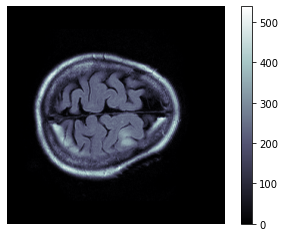

In [32]:
plt.imshow(flair_img.get_fdata()[:,:,18],plt.cm.bone)
plt.colorbar()
plt.axis("off")

Try slicing different slices yourself to get a feel for how the data is represented in this anatomical image.


## Axial, Sagittal and Coronal View

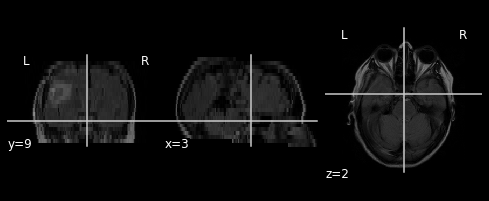

In [18]:
plot_anat(flair_img, display_mode=('ortho'))

## Anatomical View

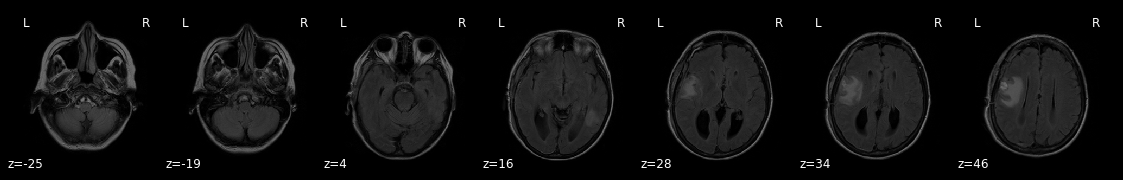

In [30]:
plot_anat(flair_img, draw_cross=False, display_mode='z')